<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/decion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [106]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.15,random_state=42)



In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [117]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

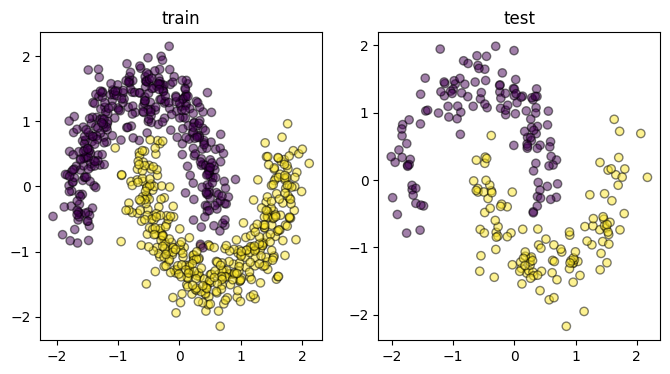

In [119]:
#plot

fig,ax=plt.subplots(1,2,figsize=(8,4))
ax1,ax2=ax
ax1.scatter(x=x_train[:,0],y=x_train[:,1],alpha=0.5 ,c=y_train,cmap='viridis',edgecolor='black')
ax2.scatter(x=x_test[:,0],y=x_test[:,1],c=y_test,alpha=0.5,cmap='viridis',edgecolors='black')
ax1.set_title('train')
ax2.set_title('test')
fig.show()


In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [127]:
from sklearn.metrics import classification_report
y_pred=dtc.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       0.99      0.99      0.99       121

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [128]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {accuracy_score(y_test, dtc.predict(x_test))*100}%")

The accuracy is 99.2%


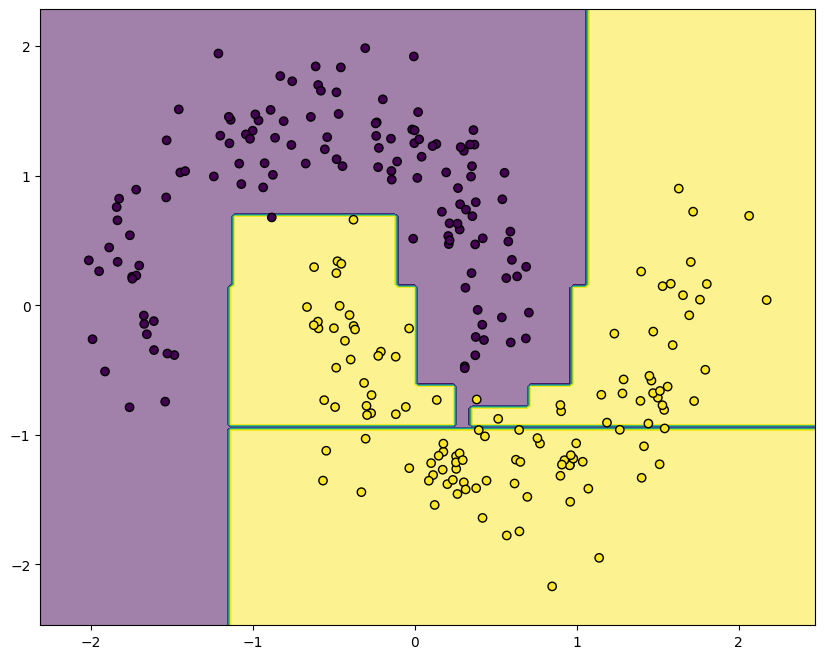

In [147]:
from sklearn.inspection import DecisionBoundaryDisplay
fig,ax=plt.subplots(1,1,figsize=(10,8))
dbd=DecisionBoundaryDisplay.from_estimator(dtc,X=X_test,grid_resolution=200,plot_method='contourf',ax=ax, alpha=0.5,
    eps=0.3,
    levels=100,)
ax.scatter(x=x_test[:,0],y=x_test[:,1],c=y_test,cmap='viridis',edgecolors='black')


